In [47]:
# imports for the dataset and building our neural network
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [49]:
len(X_train)

50000

In [50]:
len(X_test)

10000

In [51]:
X_train.shape

(50000, 32, 32, 3)

In [52]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [53]:
X_train[0].shape

(32, 32, 3)

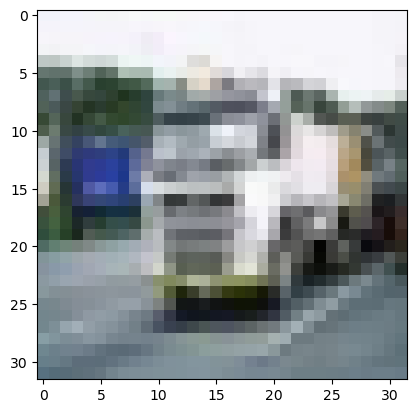

In [57]:
plt.imshow(X_train[1000]) #RGB---BGR

In [23]:
y_train[0]

array([6], dtype=uint8)

C:\Users\nilay\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


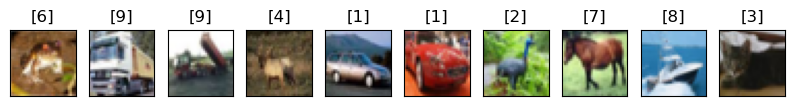

In [24]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

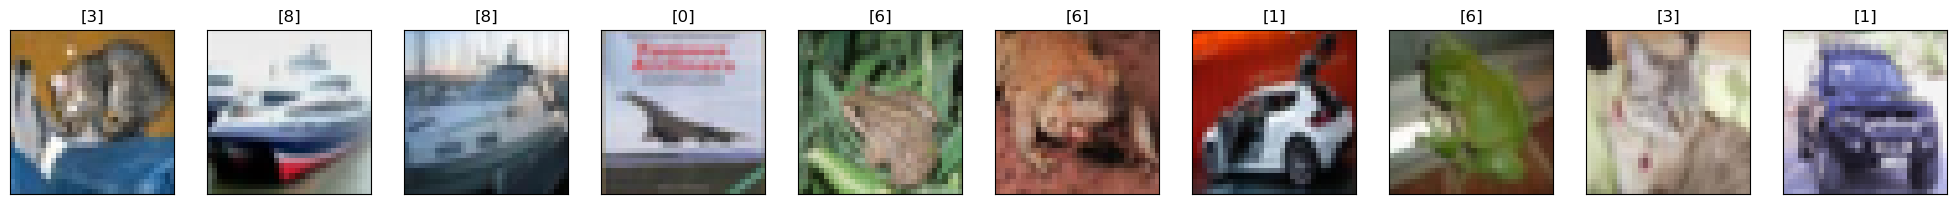

In [25]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(25, 12))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (10).

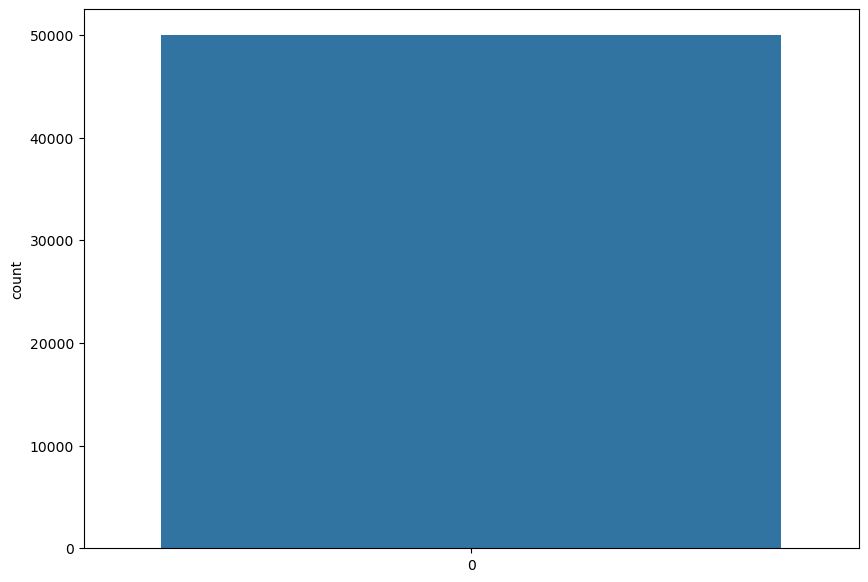

In [58]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=classes)

In [27]:
X_train.shape[0]

50000

In [28]:
X_train[0].shape

(32, 32, 3)

In [29]:
X_train.shape[0]

50000

In [30]:
X_train[0].dtype

dtype('uint8')

In [59]:
# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


In [60]:
# normalizing the data to help with the training
X_train =X_train/ 255
X_test =X_test/ 255

In [67]:
# building a linear stack of layers with the sequential model
model = Sequential()

In [68]:

# convolutional layer
conv_1=Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3))
model.add(conv_1)


In [70]:
#task: add more covolution layers and train the model

# convolutional layer
conv2=Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu')
model.add(conv2)

mp2=MaxPool2D(pool_size=(2,2))
model.add(mp2)


In [ ]:
"""
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
"""

In [71]:
# flatten output of conv
model.add(Flatten())

In [72]:
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_6 (Dense)             (None, 100)               1440100   
                                                                 
 dense_7 (Dense)             (None, 50)                5050      
                                                      

In [74]:
# compiling the sequential model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 79s 200ms/step - loss: 1.5193 - accuracy: 0.4486 - val_loss: 1.2223 - val_accuracy: 0.5681
Epoch 2/10
391/391 [==============================] - 81s 208ms/step - loss: 1.1047 - accuracy: 0.6095 - val_loss: 1.1313 - val_accuracy: 0.5995
Epoch 3/10
391/391 [==============================] - 84s 215ms/step - loss: 0.9404 - accuracy: 0.6700 - val_loss: 0.9938 - val_accuracy: 0.6533
Epoch 4/10
391/391 [==============================] - 81s 206ms/step - loss: 0.8388 - accuracy: 0.7091 - val_loss: 0.9586 - val_accuracy: 0.6671
Epoch 5/10
391/391 [==============================] - 86s 220ms/step - loss: 0.7537 - accuracy: 0.7350 - val_loss: 0.9339 - val_accuracy: 0.6726
Epoch 6/10
391/391 [==============================] - 83s 213ms/step - loss: 0.6771 - accuracy: 0.7631 - val_loss: 0.9248 - val_accuracy: 0.6807
Epoch 7/10
391/391 [==============================] - 77s 198ms/step - loss: 0.6025 - accuracy: 0.7908 - val_loss: 0.9253 - val_ac

In [39]:
model.history.history

{'loss': [1.7141858339309692,
  1.290534257888794,
  1.1549263000488281,
  1.065773844718933,
  0.9947389960289001,
  0.9110465049743652,
  0.8421573638916016,
  0.7742999196052551,
  0.7046595215797424,
  0.6423268914222717],
 'accuracy': [0.3982200026512146,
  0.5437600016593933,
  0.5952200293540955,
  0.6266800165176392,
  0.652400016784668,
  0.6816800236701965,
  0.7031800150871277,
  0.7308400273323059,
  0.7539399862289429,
  0.777180016040802],
 'val_loss': [1.3930344581604004,
  1.2629170417785645,
  1.1952006816864014,
  1.1863104104995728,
  1.1562738418579102,
  1.1479785442352295,
  1.1931557655334473,
  1.1593637466430664,
  1.134281873703003,
  1.1902285814285278],
 'val_accuracy': [0.5023000240325928,
  0.551800012588501,
  0.578000009059906,
  0.5795999765396118,
  0.5985000133514404,
  0.6046000123023987,
  0.592199981212616,
  0.6093999743461609,
  0.6157000064849854,
  0.6187000274658203]}

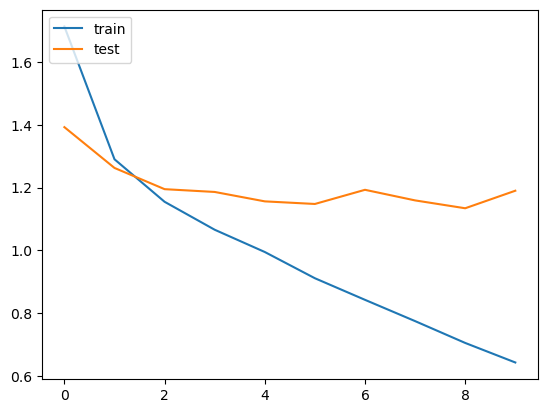

In [40]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

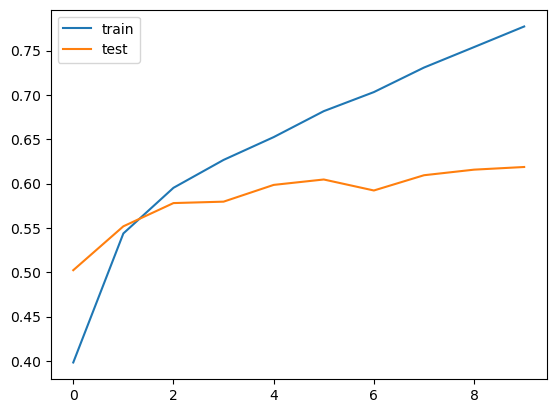

In [41]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')

In [45]:
import numpy as np
import tensorflow as tf
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred_classes)
confusion_mtx

313/313 [==============================] - 2s 6ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[692,  41,  62,  40,  14,   3,   8,  13,  93,  34],
       [ 28, 794,  11,  18,   4,   4,   8,   6,  38,  89],
       [ 79,  10, 474, 116, 127,  62,  63,  44,  14,  11],
       [ 25,  24,  79, 551,  55, 125,  75,  33,  16,  17],
       [ 36,  13, 105, 109, 558,  31,  66,  66,  12,   4],
       [ 20,  15,  76, 306,  46, 440,  30,  50,  10,   7],
       [  9,  26,  57,  93,  65,  26, 690,  12,   8,  14],
       [ 22,  15,  59,  87,  62,  61,  11, 652,   5,  26],
       [ 97,  82,  17,  26,   9,  11,   5,   3, 719,  31],
       [ 41, 183,  13,  39,   9,   5,  14,  25,  54, 617]])>

[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

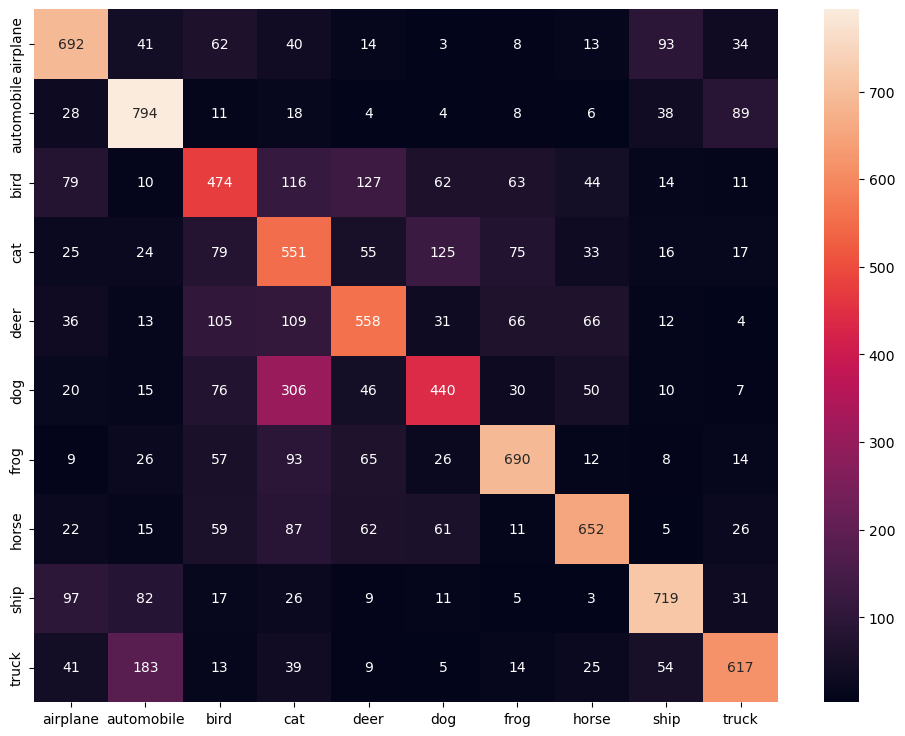

In [46]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

In [ ]:
####-------Train CNN using data-augmentation--------#####
train_datagen = ImageDataGenerator(rescale=1./255, rotation=40, width_shift=0.2, height_shift=0.2, shear=0.2, zoom=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train,batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)